In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Problem 3.5

In [3]:
d = 1
n = 500
k = 2
pi = np.array([0.7, 0.3])
w = np.array([-2, 1])
b = np.array([0.5, -0.5])
sigma = np.array([0.4, 0.3])
X = np.random.uniform(0, 1, n)
mu = 0.5#np.mean(X)
#mu = mu * w + b

In [4]:
y = np.zeros(n)
for l in range(k):
    for i in range(n):
        y[i] += pi[l] * (np.random.normal(w[l]*X[i] + b[l], sigma[l], 1))

In [5]:
def E_step(n, k, mu_hat, y, X, pi_hat, w_hat, b_hat, sigma_square_hat):
    W_temp = np.zeros((n, k))
    W = np.zeros((n, k))
    for l in range(k):
        for i in range(n):
            W_temp[i][l] = pi_hat[l] * (1/(2*np.pi*(sigma_square_hat[l]))**0.5) * np.exp(-(y[i] - w_hat[:,l]@np.array([1, X[i]]))**2 / (2*(sigma_square_hat[l])))
            #W_temp[i][l] = pi_hat[l] * (1/(2*np.pi*(sigma_square_hat[l]))**0.5) * np.exp(-(y[i] - mu_hat[l])**2 / (2*sigma_square_hat[l]))
            
    for i in range(n):
        W[i] = W_temp[i] / sum(W_temp[i])
    
    return W

In [6]:
def M_step(n, k, mu, y, X, pi_hat, w_hat, b_hat, sigma_hat, W):
    
    # calculate pi
    for l in range(k):
        pi_hat[l] = sum(W[:,l]) / n
        
    # calculate w
    w_hat_temp = np.zeros((n, k))
    for l in range(k):
        w_hat_temp[:,l] = W[:,l] * y
        w_hat[l, 0] = sum(w_hat_temp[:,l]) / sum(W[:,l] * (1 + X**2))
    w_hat_temp = np.zeros((n, k))
    for l in range(k):
        w_hat_temp[:,l] = W[:,l] * y * X
        w_hat[l, 1] = sum(w_hat_temp[:,l]) / sum(W[:,l] * (1 + X**2))
    
    '''# calculate b
    b_hat_new = np.zeros(k)
    b_hat_temp = np.zeros((n, k))
    for l in range(k):
        b_hat_temp[:,l] = W[:,l] * (X - w_hat[l]*mu)
        b_hat_new[l] = sum(b_hat_temp[:,l]) / sum(W[:,l])

    
    mu_hat = np.zeros(k)
    mu_hat_temp = np.zeros((n, k))
    for l in range(k):
        mu_hat_temp[:,l] = W[:,l] * y
        mu_hat[l] = sum(mu_hat_temp[:,l]) / sum(W[:,l])
    
    w_hat = (mu_hat - b_hat)/mu
    b_hat = mu_hat - w_hat*mu    '''
        
    # calculate sigma square
    sigma_square_hat_temp = np.zeros((n, k))
    mu_temp = np.zeros(n)
    for l in range(k):
        #sigma_square_hat_temp[:,l] = W[:,l] * ((X - w_hat_new[l]*mu - b_hat_new[l])**2)
        for i in range(n):
            mu_temp[i] = w_hat[:,l]@np.array([1, X[i]])
        sigma_square_hat_temp[:,l] = W[:,l] * ((y - mu_temp)**2)
        #sigma_square_hat_temp[:,l] = W[:,l] * ((y - mu_hat[l])**2)
        sigma_square_hat[l] = sum(sigma_square_hat_temp[:,l]) / sum(W[:,l])
    #return pi_hat, w_hat_new, b_hat_new, sigma_square_hat, mu_hat
    return pi_hat, w_hat, b_hat, sigma_square_hat, mu_hat

In [7]:
# main function

# initializing parameters
pi_hat = np.array([0.5, 0.5])
w_hat = np.array([[0, 0], [1, -1]])
b_hat = np.array([0, 0])
sigma_square_hat = np.array([np.std(y), np.std(y)])**2
log_like = []

log_like_prev = -1000
increase = 1
mu_hat = w_hat * mu + b_hat

while abs(increase) > 1e-04:
    W = E_step(n, k, mu_hat, y, X, pi_hat, w_hat, b_hat, sigma_square_hat)
    
    J = 1
    for i in range(n):
        J_temp = 0
        for l in range(k):
            J_temp += pi[l] * (1/(2*np.pi*(sigma_square_hat[l]))**0.5) * np.exp(-(y[i] - w_hat[:,l]@np.array([1, X[i]]))**2 / (2*(sigma_square_hat[l])))
            #J_temp += pi[l] * (1/(2*np.pi*(sigma_square_hat[l]))**0.5) * np.exp(-(y[i] - mu_hat[l])**2 / (2*(sigma_square_hat[l])))
        J *= J_temp
    
    log_like.append(np.log(J))
    increase = np.log(J) - log_like_prev
    log_like_prev = np.log(J)
    
    [pi_hat, w_hat, b_hat, sigma_square_hat, mu_hat] = M_step(n, k, mu, y, X, pi_hat, w_hat, b_hat, sigma_square_hat, W)
    

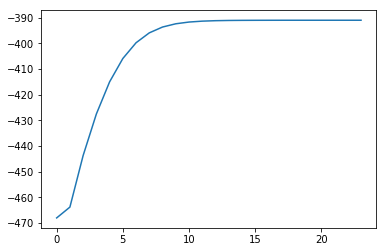

In [9]:
plt.plot(log_like)
plt.show()

In [10]:
[pi, w, b, sigma]

[array([0.7, 0.3]), array([-2,  1]), array([ 0.5, -0.5]), array([0.4, 0.3])]

In [11]:
[pi_hat, w_hat, b_hat, sigma_square_hat**0.5, mu_hat]

print('pi_hat', pi_hat)
print('w_hat', w_hat)
print('b_hat', b_hat)
print('sigma_hat', sigma_square_hat**0.5)
print('mu_hat', mu_hat)

pi_hat [0.19230996 0.80769004]
w_hat [[0 0]
 [0 0]]
b_hat [0 0]
sigma_hat [0.52870652 0.52892601]
mu_hat [[ 0.   0. ]
 [ 0.5 -0.5]]


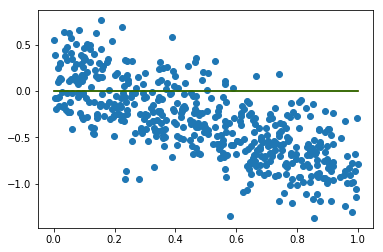

In [13]:
plt.plot(X, y, 'o')
xaxis = np.linspace(0,1,9)
plt.plot(xaxis, w_hat[0][1]*xaxis + w_hat[0][0], color='r')
plt.plot(xaxis, w_hat[1][1]*xaxis + w_hat[1][0], color='g')
plt.show()